# B SF Permits Exploration
6 points

- Explore the data. Which columns correlate strongly with the "Current Status" column? How do other columns correlate to each other?
- Describe problems with "Current Status" as a target column to predict. Can you construct a better target column?

### Anmerkung:

Die Werte in der Spalte "Current Status" sind Text und nicht nummerisch, daher könnte es schwierig werden Korrelationen zu finden, da Korrelation mit numerischen Werten arbeitet. Wir behelfen uns aber, in dem wir einfach die verschiedenen Zustände in Kategorien repräsentieren. 

In [4]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [5]:
# get San Francisco building permits csv files as a DataFrame


building_df = pd.read_csv("./Building_Permits.csv")

# preview developmental data
building_df.head(5)

C:\Users\D073616\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [6]:
#constructing a better target column for 'Current Status'
permitted = ['approved', 'issued', 'complete']
for i in permitted:
    building_df['Current Status'].replace(to_replace=i, value='1', inplace=True)

not_permitted = ['appeal', 'plancheck', 'suspend', 'reinstated', 'filed', 'disapproved', 'incomplete', 'revoked', 'expired', 'cancelled', 'withdrawn']
for i in not_permitted:
    building_df['Current Status'].replace(to_replace=i, value='0', inplace=True)   
    
building_df['Current Status'] = pd.to_numeric(building_df['Current Status'])

In [7]:
#see if its worked?
building_df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


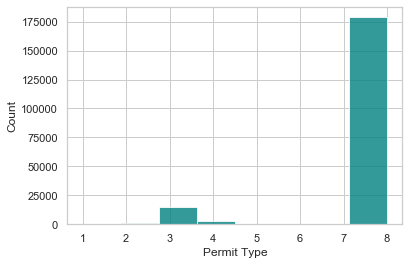

In [8]:
# Lassen uns die Anzahl der einzelenn Permit Types anzeigen
building_df['Permit Type'].mode()
ax = building_df['Permit Type'].hist(bins=8, color='teal', alpha=0.8)
ax.set(xlabel='Permit Type', ylabel='Count')
plt.show()

In [9]:
# da die einzelnen Spalten (Existing Use, Neighbhorhood -analysis... ) noch Strings enthalen, ersetzen wir diese mit numerischen Werten
use_numbers, use_label = pd.factorize(building_df['Existing Use'])
building_df['Existing Use'] = use_numbers

neighborhood_numbers, neighboorhood_label = pd.factorize(building_df['Neighborhoods - Analysis Boundaries'])
building_df['Neighborhoods - Analysis Boundaries'] = neighborhood_numbers
building_df.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,0,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,0,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,1,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,2,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,0,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,3,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,4,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,5,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,6,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,7,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


### Korrelation zwischen Permit Type und Current Status

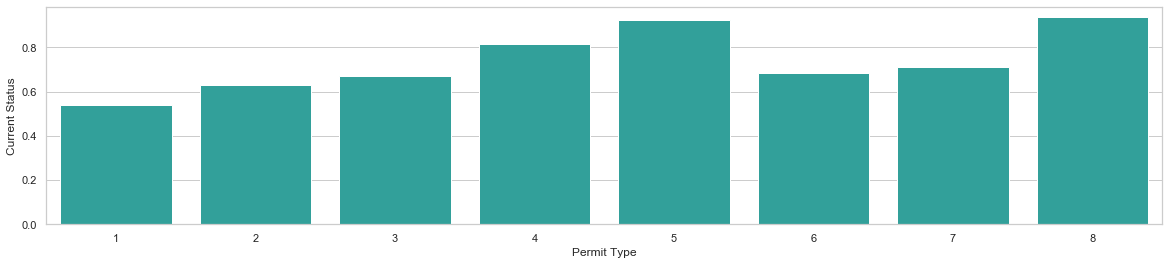

In [10]:
plt.figure(figsize=(20,4))
avg_status_by_permittype = building_df[['Permit Type','Current Status']].groupby('Permit Type',as_index=False).mean()
sns.barplot(x='Permit Type', y='Current Status', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()

Wie man hier sehen kann, Permit Type 4,5 und 8 wird am meisten erlaubt.

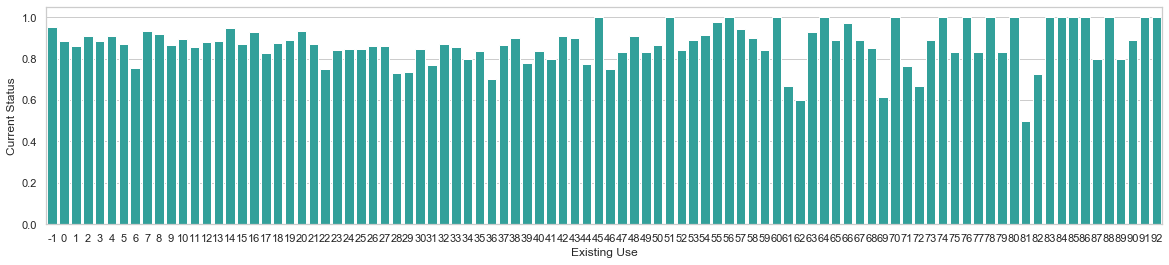

In [11]:
plt.figure(figsize=(20,4))
avg_status_by_permittype = building_df[['Existing Use','Current Status']].groupby('Existing Use',as_index=False).mean()
sns.barplot(x='Existing Use', y='Current Status', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()

Hier kann man sehen, dass nahezu keine Korrelation zwischen den beiden oben getesteten Spalten besteht

### Korrelation zwischen Number of Existing Stories und Current Status

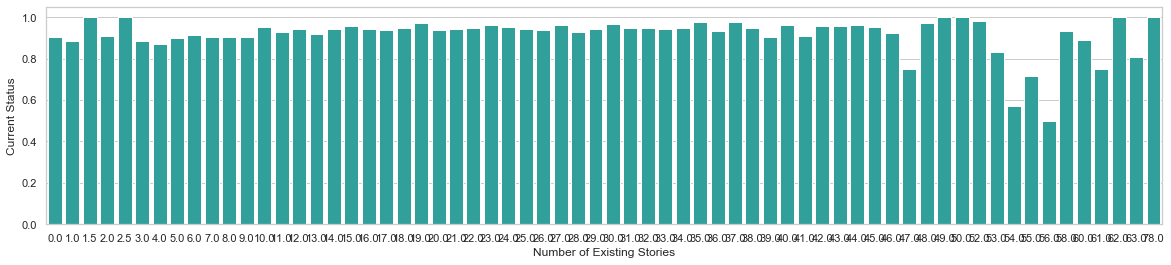

In [12]:
plt.figure(figsize=(20,4))
avg_status_by_permittype = building_df[['Number of Existing Stories','Current Status']].groupby('Number of Existing Stories',as_index=False).mean()
sns.barplot(x='Number of Existing Stories', y='Current Status', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()

Hier kann man sehen, dass nahezu keine Korrelation zwischen den beiden oben getesteten Spalten besteht

### Korrelation zwischen Plansets und Current Status

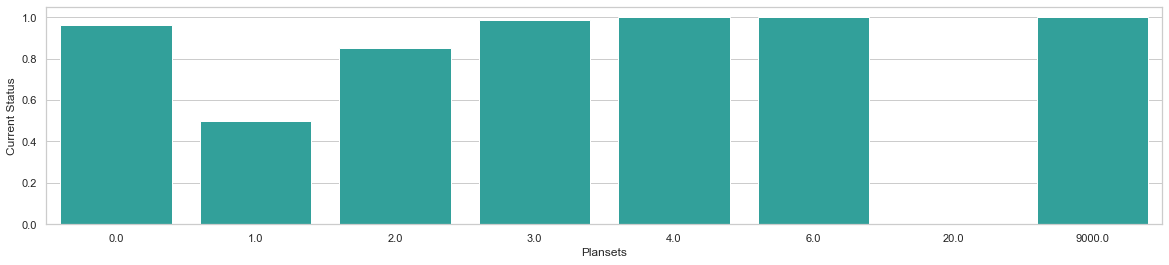

In [13]:
plt.figure(figsize=(20,4))
avg_status_by_permittype = building_df[['Plansets','Current Status']].groupby('Plansets',as_index=False).mean()
sns.barplot(x='Plansets', y='Current Status', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()

### Korrelation zwischen Existing Construction Type und Current Status

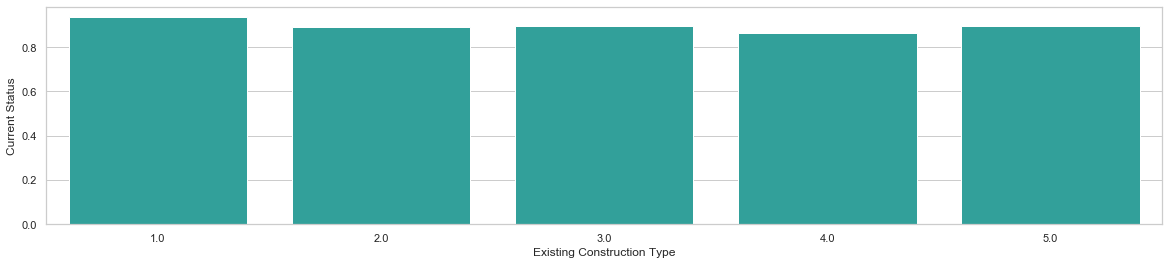

In [14]:
plt.figure(figsize=(20,4))
avg_status_by_permittype = building_df[['Existing Construction Type','Current Status']].groupby('Existing Construction Type',as_index=False).mean()
sns.barplot(x='Existing Construction Type', y='Current Status', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()


Hier kann man sehen, dass nahezu keine Korrelation zwischen den beiden oben getesteten Spalten besteht

### Korrelation zwischen Neighborhoods - Analysis Boundaries und Current Status

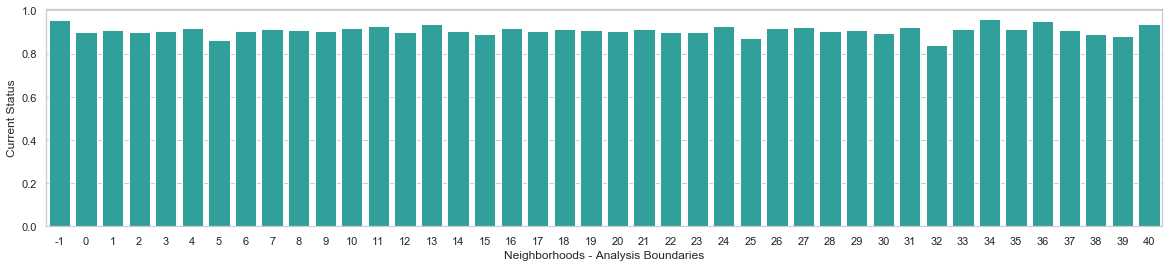

In [15]:
plt.figure(figsize=(20,4))
avg_status_by_permittype = building_df[['Neighborhoods - Analysis Boundaries','Current Status']].groupby('Neighborhoods - Analysis Boundaries',as_index=False).mean()
sns.barplot(x='Neighborhoods - Analysis Boundaries', y='Current Status', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()


Hier kann man sehen, dass nahezu keine Korrelation zwischen den beiden oben getesteten Spalten besteht

C:\Users\D073616\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\D073616\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


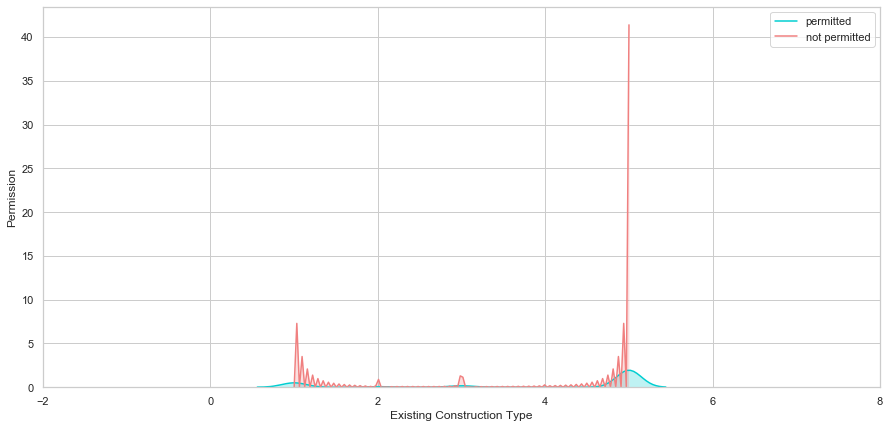

In [16]:
plt.figure(figsize=(15,7))
sns.kdeplot(building_df['Existing Construction Type'][building_df['Current Status'] == 1], color="darkturquoise", shade=True)
sns.kdeplot(building_df['Existing Construction Type'][building_df['Current Status'] == 0], color="lightcoral", shade=True)
plt.legend(['permitted', 'not permitted'])
plt.xlabel('Existing Construction Type')
plt.ylabel('Permission')
plt.xlim(-2,8)
plt.show()

Alles in allem gibt es aber keinen eindeutigen Zusammenhang zwischen der Genehmigung einer Baugenehmigung und den anderen Säulen.

### Korrelation zwischen Neighborhoods - Analysis Boundaries und Existing Construction Type

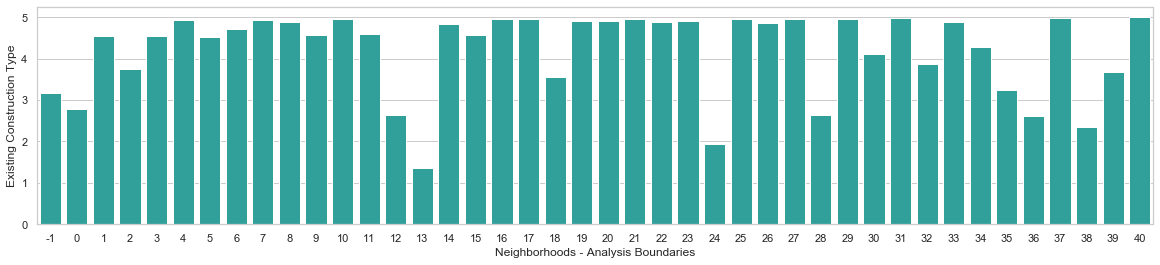

In [17]:
plt.figure(figsize=(20,4))
avg_status_by_permittype = building_df[['Neighborhoods - Analysis Boundaries','Existing Construction Type']].groupby('Neighborhoods - Analysis Boundaries',as_index=False).mean()
sns.barplot(x='Neighborhoods - Analysis Boundaries', y='Existing Construction Type', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()

In [18]:
sns.barplot('Permit Creation Year', 'Current Status', data=imputed, color="teal")
plt.show()

NameError: name 'imputed' is not defined

### Fazit:

Nach der Durchsicht des Datensatzes kann man sagen, dass keine Spalte gut mit dem "Current Status" korreliert,
da sie zu viele verschiedene Kategorien hat. Es ist überall annährend gleich verteilt. Wenn man ganz genau hinschaut, könnte man beim Permit Type eine Korrelation fest stellen, da 4,5 und 8 am häufigsten freigegeben werden
